**Jaccard Similarity Notebook**

In [2]:
import nltk
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())  
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return set(tokens)

In [4]:
print(len(inaugural.fileids()))

59


In [5]:
text1 = inaugural.raw('2009-Obama.txt')
text2 = inaugural.raw('2013-Obama.txt')

In [6]:
set1 = preprocess(text1)
set2 = preprocess(text2)

In [7]:
jaccard_score = len(set1.intersection(set2)) / len(set1.union(set2))
print(f"Jaccard Similarity Score: {jaccard_score:.4f}")

Jaccard Similarity Score: 0.2104


In [8]:
files = inaugural.fileids()
processed_texts = {file: preprocess(inaugural.raw(file)) for file in files}

In [9]:
num_files = len(files)
jaccard_matrix = np.zeros((num_files, num_files))

In [10]:
for i in range(num_files):
    for j in range(num_files):
        if i <= j:
            set1, set2 = processed_texts[files[i]], processed_texts[files[j]]
            jaccard_score = len(set1.intersection(set2)) / len(set1.union(set2))
            jaccard_matrix[i, j] = jaccard_score
            jaccard_matrix[j, i] = jaccard_score

In [11]:
df_jaccard = pd.DataFrame(jaccard_matrix, index=files, columns=files)

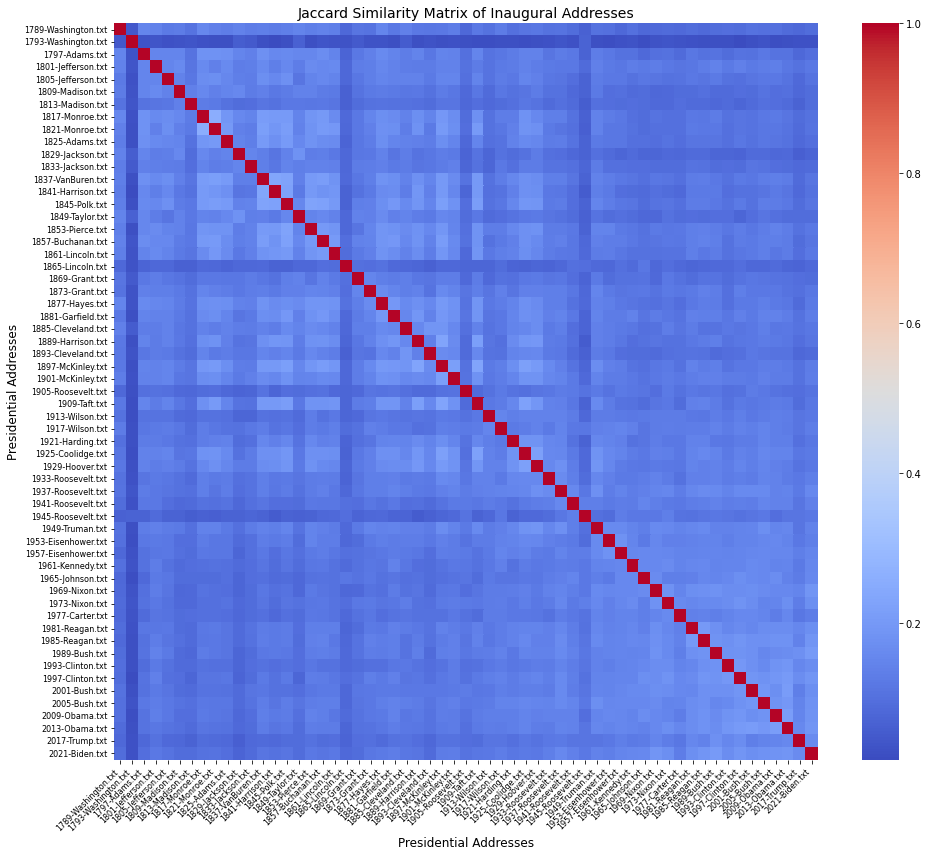

In [12]:
plt.figure(figsize=(14, 12)) 
ax = sns.heatmap(df_jaccard, cmap='coolwarm', annot=False, xticklabels=True, yticklabels=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)
plt.title("Jaccard Similarity Matrix of Inaugural Addresses", fontsize=14)
plt.xlabel("Presidential Addresses", fontsize=12)
plt.ylabel("Presidential Addresses", fontsize=12)
plt.tight_layout()
plt.show()


In [13]:
pairs = []
num_files = len(files)
for i in range(num_files):
    for j in range(i + 1, num_files):  
        pairs.append((files[i], files[j], jaccard_matrix[i, j]))
df = pd.DataFrame(pairs, columns=['Address 1', 'Address 2', 'Jaccard Score'])
print(df)

                Address 1            Address 2  Jaccard Score
0     1789-Washington.txt  1793-Washington.txt       0.048237
1     1789-Washington.txt       1797-Adams.txt       0.150763
2     1789-Washington.txt   1801-Jefferson.txt       0.144050
3     1789-Washington.txt   1805-Jefferson.txt       0.122044
4     1789-Washington.txt     1809-Madison.txt       0.127990
...                   ...                  ...            ...
1706       2009-Obama.txt       2017-Trump.txt       0.151911
1707       2009-Obama.txt       2021-Biden.txt       0.186511
1708       2013-Obama.txt       2017-Trump.txt       0.157350
1709       2013-Obama.txt       2021-Biden.txt       0.190346
1710       2017-Trump.txt       2021-Biden.txt       0.165245

[1711 rows x 3 columns]
